In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [361]:
census = pd.read_csv('adult.csv')

In [362]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [363]:
census.rename(columns={'education.num':'education_num', 'marital.status':'marital_status',
                      'capital.gain':'capital_gain', 'capital.loss': 'capital_loss',
                      'hours.per.week': 'hours', 'native.country': 'native_country'}, inplace=True)

In [364]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours             32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [365]:
census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours             0
native_country    0
income            0
dtype: int64

In [366]:
census['outcome'] = census.income.map({'<=50K':0, '>50K':1})
census

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours,native_country,income,outcome
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K,1


# Feature Selection

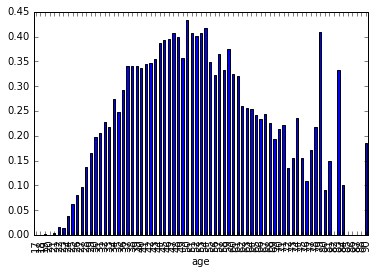

In [367]:
#Age
census.groupby('age').outcome.mean().plot(kind='bar')

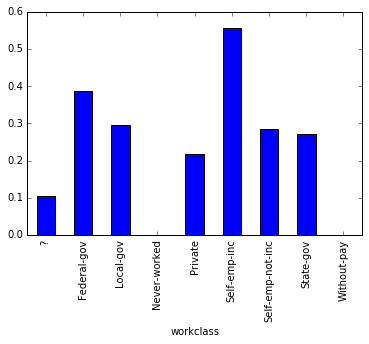

In [368]:
#workclass
census.groupby('workclass').outcome.mean().plot(kind='bar')

In [369]:
# create job_dummies 
workclass_dummies = pd.get_dummies(census.workclass, prefix='workclass')
workclass_dummies.drop(workclass_dummies.columns[0], axis=1, inplace=True)
workclass_dummies.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


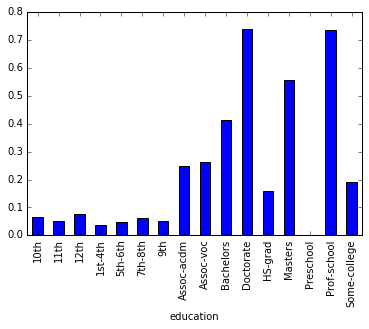

In [370]:
#education
census.groupby('education').outcome.mean().plot(kind='bar')

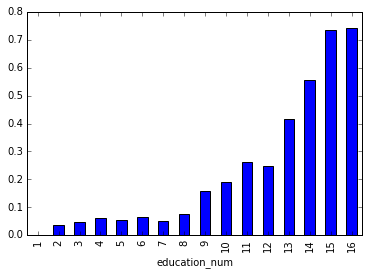

In [371]:
#education.num 
census.groupby('education_num').outcome.mean().plot(kind='bar')

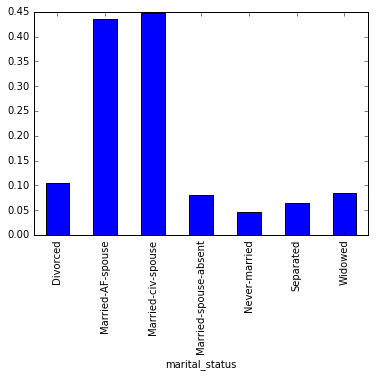

In [372]:
#marital_status
census.groupby('marital_status').outcome.mean().plot(kind='bar')

In [373]:
marital_status_dummies = pd.get_dummies(census.marital_status, prefix='marital_status')
marital_status_dummies.drop(marital_status_dummies.columns[0], axis=1, inplace=True)
marital_status_dummies.head()

,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


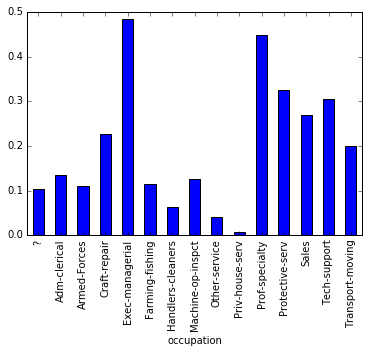

In [374]:
#occupation
census.groupby('occupation').outcome.mean().plot(kind='bar')

In [375]:
occupation_dummies = pd.get_dummies(census.occupation, prefix='occupation')
occupation_dummies.drop(occupation_dummies.columns[0], axis=1, inplace=True)
occupation_dummies.head()

,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


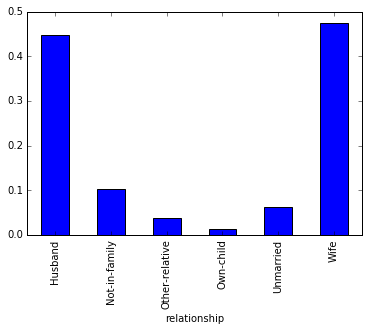

In [376]:
#relationship
census.groupby('relationship').outcome.mean().plot(kind='bar')

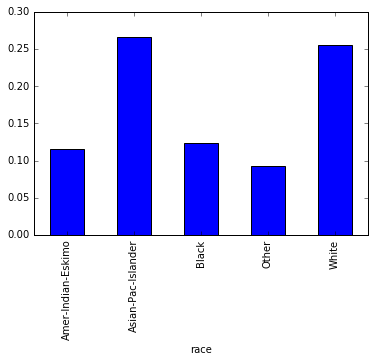

In [377]:
#race
census.groupby('race').outcome.mean().plot(kind='bar')

In [378]:
race_dummies = pd.get_dummies(census.race, prefix='race')
race_dummies.drop(race_dummies.columns[0], axis=1, inplace=True)
race_dummies.head(10)

,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0


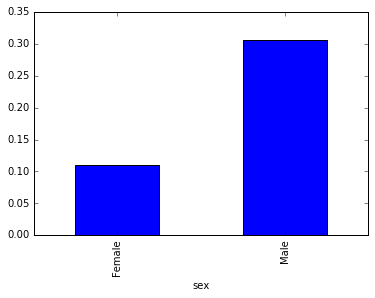

In [379]:
#sex
census.groupby('sex').outcome.mean().plot(kind='bar')

In [380]:
sex_dummies = pd.get_dummies(census.sex, prefix='sex')
sex_dummies.drop(sex_dummies.columns[0], axis=1, inplace=True)
sex_dummies.head(10)

,sex_Male
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,1.0


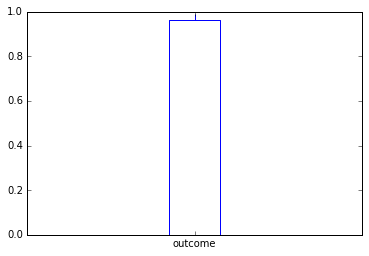

In [381]:
#capital.gain
census.groupby('capital_gain').outcome.mean().plot(kind='box')

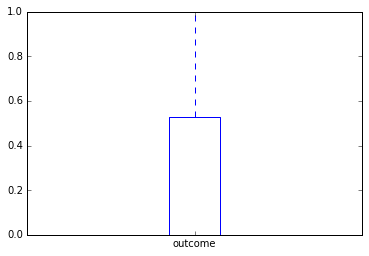

In [382]:
#capital_loss
census.groupby('capital_loss').outcome.mean().plot(kind='box')

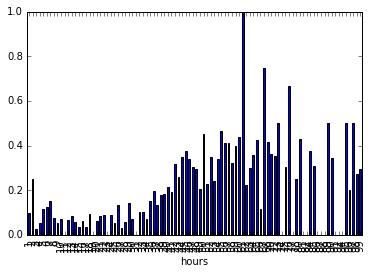

In [383]:
#hours.per.week
census.groupby('hours').outcome.mean().plot(kind='bar')

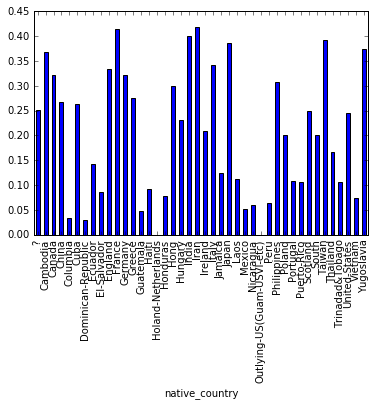

In [384]:
#native_country
census.groupby('native_country').outcome.mean().plot(kind='bar')

In [385]:
census.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours,outcome
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
outcome,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


# Null Case

In [386]:
float(census.outcome[census.outcome == 1].count())/(census.outcome.count())

0.2408095574460244

In [387]:
census.outcome.count()

32561

In [388]:
census.outcome[census.outcome == 1].count()

7841

# Model Building

In [389]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics

In [390]:
census = pd.concat([census,workclass_dummies,marital_status_dummies, occupation_dummies, race_dummies, sex_dummies],axis=1)

In [391]:
census.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'race', u'sex',
       u'capital_gain', u'capital_loss', u'hours', u'native_country',
       u'income', u'outcome', u'workclass_Federal-gov', u'workclass_Local-gov',
       u'workclass_Never-worked', u'workclass_Private',
       u'workclass_Self-emp-inc', u'workclass_Self-emp-not-inc',
       u'workclass_State-gov', u'workclass_Without-pay',
       u'marital_status_Married-AF-spouse',
       u'marital_status_Married-civ-spouse',
       u'marital_status_Married-spouse-absent',
       u'marital_status_Never-married', u'marital_status_Separated',
       u'marital_status_Widowed', u'occupation_Adm-clerical',
       u'occupation_Armed-Forces', u'occupation_Craft-repair',
       u'occupation_Exec-managerial', u'occupation_Farming-fishing',
       u'occupation_Handlers-cleaners', u'occupation_Machine-op-inspct',
       u'occupation_Other-service', u'occupation_Pri

In [409]:
features_list = ['age', 'education_num'] + list(workclass_dummies.columns) + list(marital_status_dummies.columns) + list(occupation_dummies.columns) + list(race_dummies.columns) + list(sex_dummies.columns)

In [410]:
features_list

['age',
 'education_num',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'marital_status_Married-AF-spouse',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'sex_Male']

In [416]:
X = census[features_list]
y = census['outcome']

In [395]:
pd.set_option('display.max_columns', None)

In [411]:
census.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours,outcome,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037,0.051227,0.060901,-0.019362,-0.198388,0.102692,0.136252,0.012763,0.013995,-0.011896,0.315679,0.016698,-0.534359,0.010210,0.265177,-0.042902,-0.010190,0.012515,0.099352,0.034210,-0.098579,-0.016257,-0.089346,0.015624,0.054170,0.003891,-0.031980,-0.019576,0.026909,-0.011111,-0.019434,-0.034415,0.033412,0.088832
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463,-0.007525,-0.002828,0.005031,0.042907,-0.024626,-0.039058,-0.010891,-0.003048,-0.000406,-0.026363,0.003634,0.037108,0.028467,-0.026246,0.007765,0.004040,0.008465,-0.019198,-0.032932,0.029015,0.012762,-0.003719,0.007278,-0.016206,0.016567,0.003728,0.003765,0.001265,-0.051323,0.118009,0.006376,-0.056896,0.026858
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154,0.060518,0.097941,-0.015117,-0.118484,0.077358,0.016466,0.102589,-0.008136,0.000964,0.086078,-0.034223,-0.032109,-0.055152,-0.068044,0.004620,0.000197,-0.143073,0.200923,-0.101533,-0.127934,-0.158503,-0.169684,-0.071638,0.419006,0.005777,0.030253,0.060703,-0.115960,0.062091,-0.075272,-0.044133,0.051353,0.012280
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329,-0.005768,-0.007007,-0.002140,-0.038701,0.096885,0.031847,-0.010373,-0.001656,-0.002322,0.085873,-0.006542,-0.066334,-0.013233,-0.012166,-0.028502,-0.002426,-0.022000,0.060618,-0.011724,-0.023272,-0.025957,-0.040271,-0.007324,0.085222,-0.007136,0.011652,-0.009372,-0.018061,0.009851,-0.020631,-0.001774,0.014429,0.048480
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526,0.010798,0.014668,-0.003177,-0.027460,0.031714,0.021175,-0.002047,-0.004494,-0.005760,0.080466,-0.008355,-0.060623,-0.013061,-0.003361,-0.023806,0.005049,0.001094,0.048311,-0.010670,-0.021672,-0.016259,-0.040847,-0.011081,0.046255,-0.003174,0.009697,0.004830,-0.003282,0.004469,-0.021762,-0.005964,0.021044,0.045567
hours,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689,0.013293,0.011576,-0.014262,-0.020928,0.127869,0.093884,-0.023200,-0.012973,0.001492,0.212817,-0.007089,-0.197936,-0.016587,-0.107122,-0.084378,0.000309,0.057375,0.139208,0.094170,-0.042265,0.006598,-0.155872,-0.041467,0.060253,0.028102,0.009889,-0.013946,0.077596,-0.004564,-0.053153,-0.007188,0.049345,0.229309
outcome,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000,0.059372,0.033091,-0.008259,-0.078528,0.139467,0.030019,0.014843,-0.011681,0.012061,0.444696,-0.042532,-0.318440,-0.074386,-0.064381,-0.089986,-0.005044,-0.012576,0.214861,-0.051925,-0.087265,-0.069401,-0.156348,-0.037122,0.185866,0.028118,0.023688,0.025696,-0.021476,0.010543,-0.089089,-0.031830,0.085224,0.215980
workclass_Federal-gov,0.051227,-0.007525,0.060518,-0.005768,0.010798,0.013293,0.059372,1.000000,-0.045682,-0.002556,-0.264369,-0.032835,-0.050709,-0.035515,-0.003615,0.015867,0.010732,-0.002135,-0.027056,-0.004388,0.007099,0.116805,0.095400,-0.031116,0.033020,-0.022486,-0.015728,-0.034030,-0.037413,-0.011817,0.028852,0.011516,-0.053873,0.044342,-0.018566,0.013808,0.047403,-0.001978,-0.050995,0.000989
workclass_Local-gov,0.060901,-0

In [397]:
#KNN

In [417]:
knn = KNeighborsClassifier(15)
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

0.82119720585289446

In [418]:
from sklearn.grid_search import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 29, 2)}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

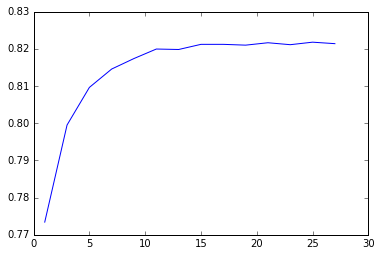

In [419]:
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(range(1, 29, 2), grid_mean_scores)

In [420]:
cross_val_score(knn, X, y, cv=5, scoring='roc_auc').mean()

0.82804620583833233

In [402]:
#Logistic Regression

In [421]:
logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

0.82896698570351268

In [422]:
cross_val_score(logreg, X, y, cv=5, scoring='roc_auc').mean()

0.87706519962715623

In [405]:
#Naive Bayes

In [423]:
nb = MultinomialNB()
cross_val_score(nb, X, y, cv=5, scoring='accuracy').mean()

0.80172587163605125

In [424]:
cross_val_score(nb, X, y, cv=5, scoring='roc_auc').mean()

0.8371324333027429